In [524]:
import pandas as pd
import numpy as np

In [525]:
df=pd.read_csv(r"C:\Imp\SamanyuK\Datasets\loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


<Axes: >

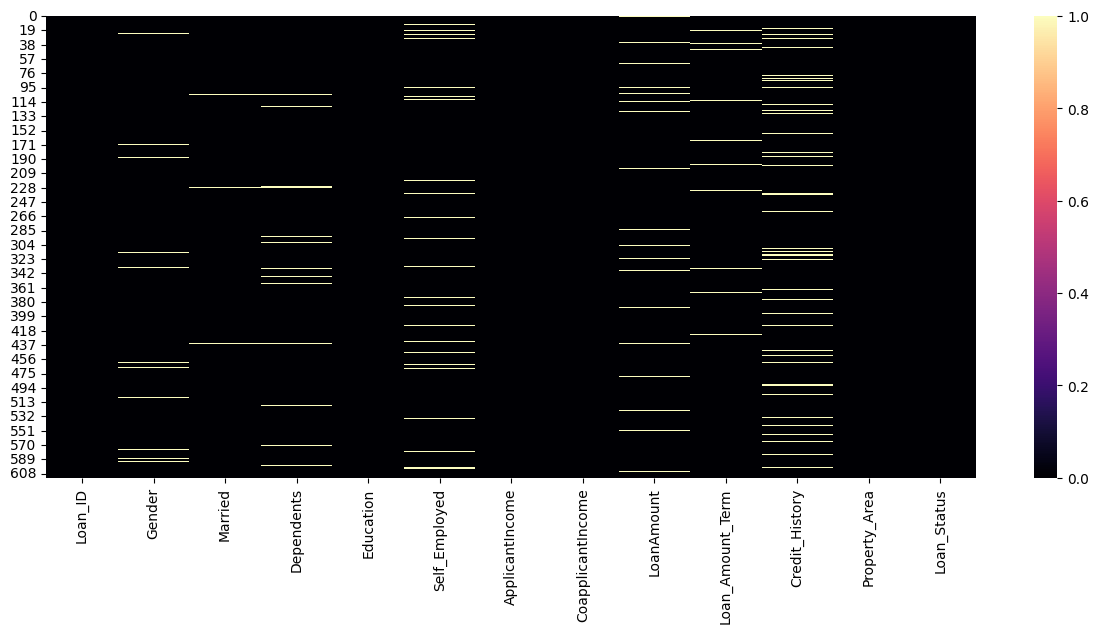

In [527]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull(),cmap='magma')

In [528]:
print(df['Gender'].isnull().sum())
print(df['Gender'].unique())
df['Gender']=df['Gender'].apply(lambda x: 1 if x=='Male' else 0)
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Gender']=df['Gender'].astype(int)

13
['Male' 'Female' nan]


In [529]:
print(df['Married'].isnull().sum())
print(df['Married'].unique())
df['Married']=df['Married'].apply(lambda x: 1 if x=='Yes' else 0)
df['Married']=df['Married'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].astype(int)

3
['No' 'Yes' nan]


In [530]:
print(df['Dependents'].isnull().sum())
print(df['Dependents'].value_counts())

15
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


In [531]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Dependents']=df['Dependents'].replace('3+','3')
df['Dependents']=df['Dependents'].astype(int)

In [532]:
print(df['Self_Employed'].isnull().sum())
print(df['Self_Employed'].unique())
df['Self_Employed']=df['Self_Employed'].apply(lambda x: 0 if x=='No' else 1)
df['Self_Employed']=df['Self_Employed'].astype(int)

32
['No' 'Yes' nan]


In [533]:
print(df['LoanAmount'].isnull().sum())
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

22


In [534]:
print(df['Loan_Amount_Term'].isnull().sum())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

14


In [535]:
print(df['Credit_History'].isnull().sum())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

50


In [536]:
df.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [537]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(4), int64(1), object(4)
memory usage: 57.6+ KB


In [538]:
print(df['Loan_Status'].unique())
df['Loan_Status']=df['Loan_Status'].apply(lambda x: 0 if x=='N' else 1)
df['Loan_Status']=df['Loan_Status'].astype(int)

['Y' 'N']


In [539]:
print(df['Education'].value_counts())
print(df['Education'].unique())
df['Education']=df['Education'].apply(lambda x: 1 if x=='Graduate' else 0)
df['Education']=df['Education'].astype(int)

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
['Graduate' 'Not Graduate']


In [540]:
df['Property_Area'].unique()
tdf=pd.get_dummies(df['Property_Area'])
df=pd.concat([df,tdf],axis=1)
df=df.drop(columns='Property_Area')

In [541]:
df[['Rural','Semiurban','Urban']]=df[['Rural','Semiurban','Urban']].astype(int)

In [542]:
df.drop(columns='Loan_ID',axis=1,inplace=True)

In [543]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Loan_Status        614 non-null    int32  
 11  Rural              614 non-null    int32  
 12  Semiurban          614 non-null    int32  
 13  Urban              614 non-null    int32  
dtypes: float64(4), int32(9), int64(1)
memory usage: 50.4 KB


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,0,0,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,0,1


In [544]:
df.columns
df=df[['Gender', 'Married', 'Dependents','Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Rural',
       'Semiurban', 'Urban' ,'Loan_Status']]

In [545]:
df=df.drop_duplicates(inplace=False)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,0,0,1,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,0,1,1


<Axes: >

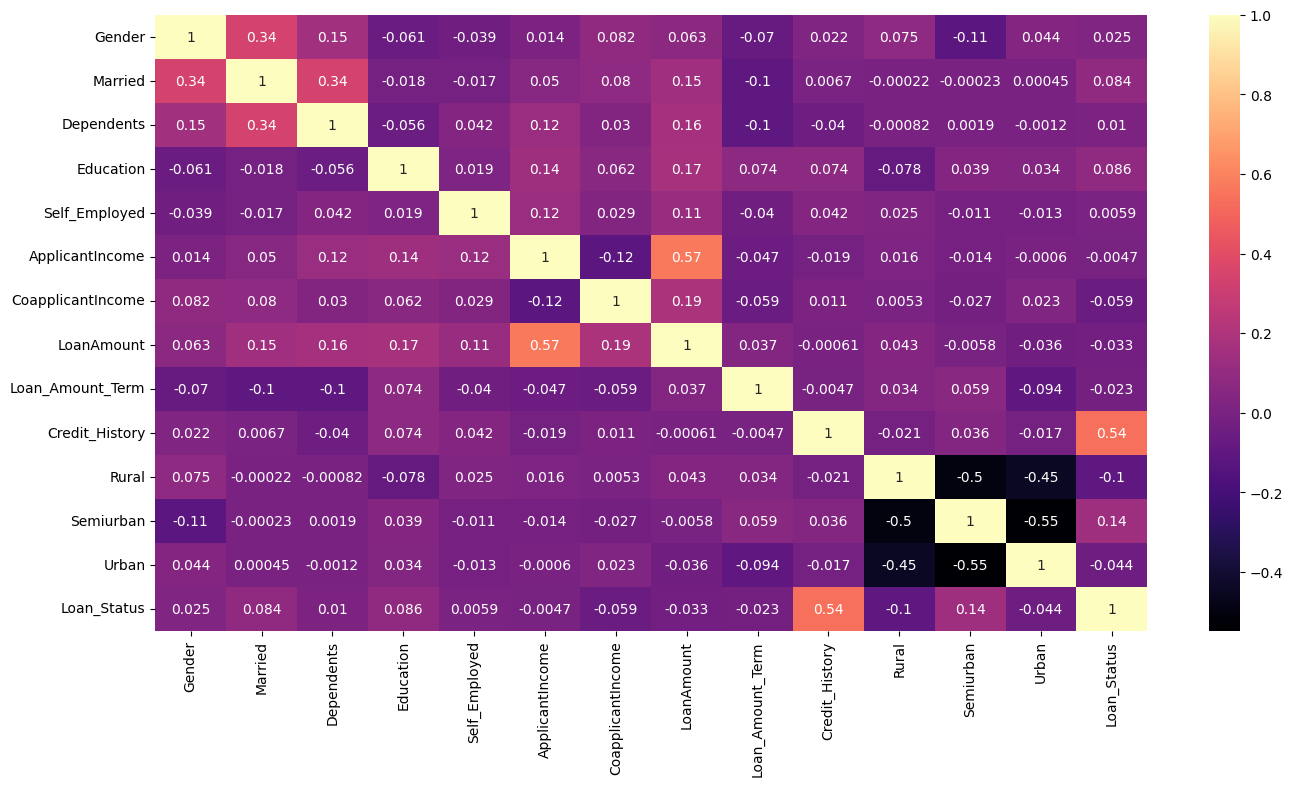

In [546]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),cmap='magma',annot=True)

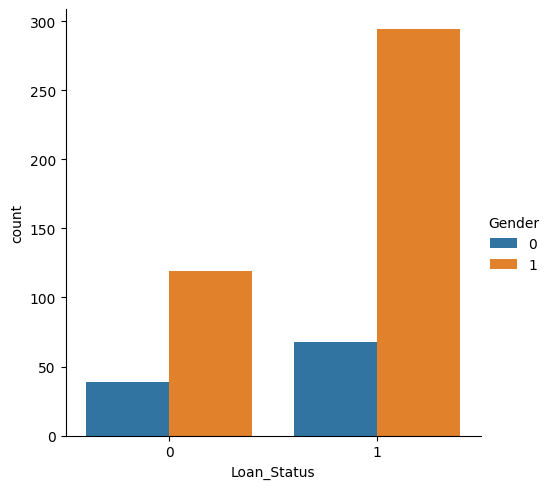

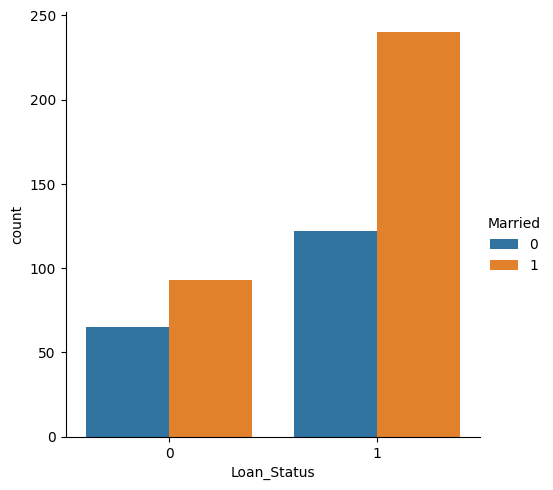

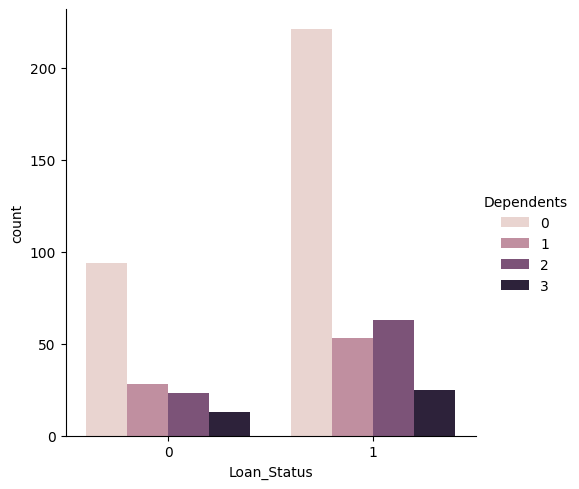

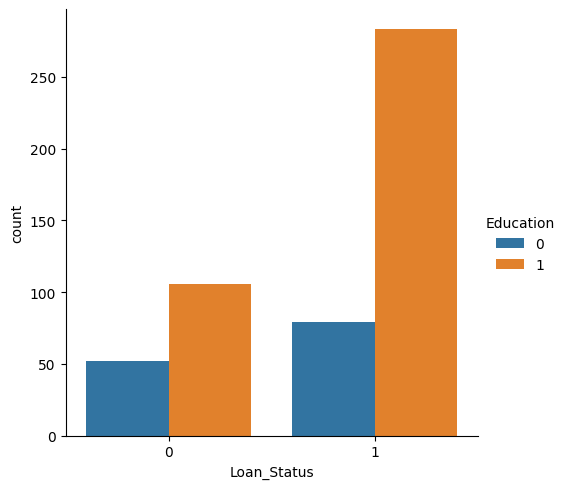

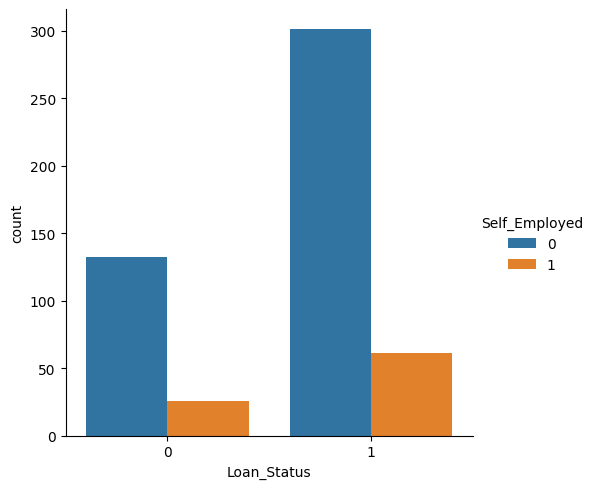

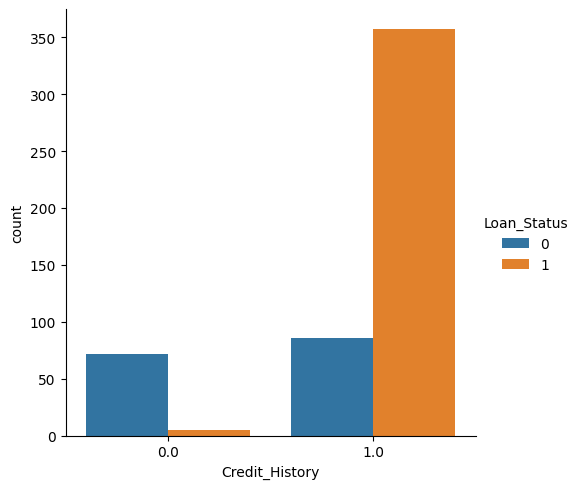

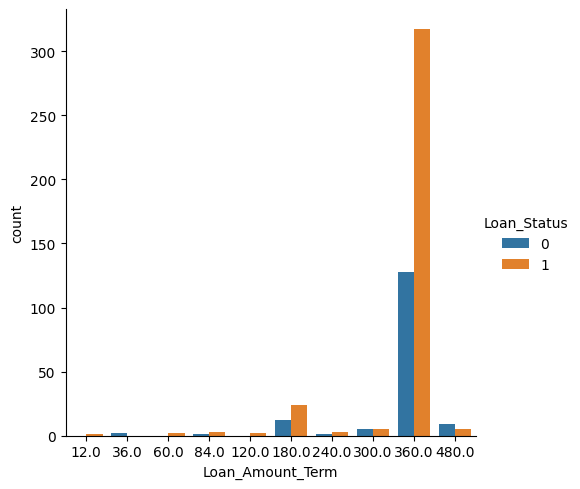

In [561]:
sns.catplot(x='Loan_Status', hue='Gender', data=df, kind='count')
sns.catplot(x='Loan_Status', hue='Married', data=df, kind='count')
sns.catplot(x='Loan_Status', hue='Dependents', data=df, kind='count')
sns.catplot(x='Loan_Status', hue='Education', data=df, kind='count')
sns.catplot(x='Loan_Status', hue='Self_Employed', data=df, kind='count')
sns.catplot(df,x='Credit_History',hue='Loan_Status',kind='count')
sns.catplot(df,x='Loan_Amount_Term',hue='Loan_Status',kind='count')

In [548]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Rural', 'Semiurban', 'Urban',
       'Loan_Status'],
      dtype='object')

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

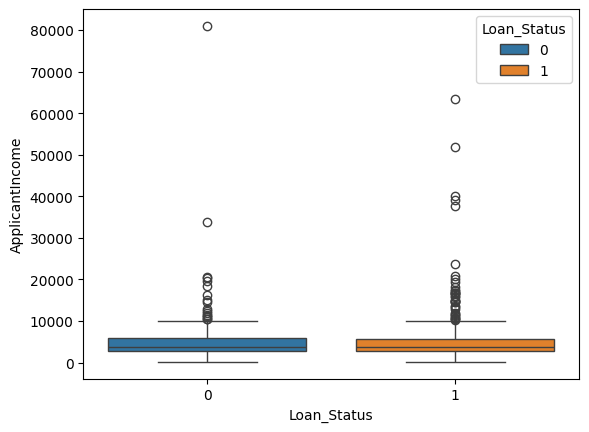

In [549]:
sns.boxplot(x='Loan_Status',data=df,y='ApplicantIncome',hue='Loan_Status')

In [550]:
q1=df['ApplicantIncome'].quantile(0.25)
q3=df['ApplicantIncome'].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
df=df[(df['ApplicantIncome']>=lb)&(df['ApplicantIncome']<=ub)]

<Axes: xlabel='Loan_Status', ylabel='CoapplicantIncome'>

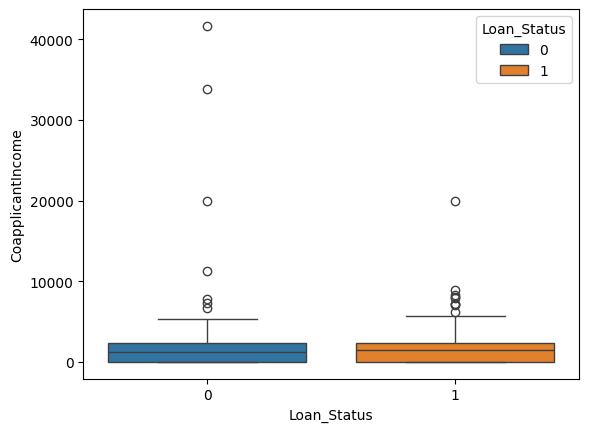

In [551]:
sns.boxplot(x='Loan_Status',data=df,y='CoapplicantIncome',hue='Loan_Status')

In [552]:
q1=df['CoapplicantIncome'].quantile(0.25)
q3=df['CoapplicantIncome'].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
df=df[(df['CoapplicantIncome']>=lb)&(df['CoapplicantIncome']<=ub)]

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

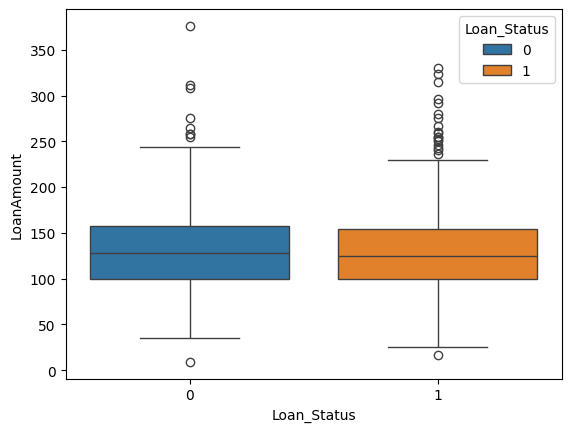

In [553]:
sns.boxplot(x='Loan_Status',data=df,y='LoanAmount',hue='Loan_Status')

In [554]:
q1=df['LoanAmount'].quantile(0.25)
q3=df['LoanAmount'].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
df=df[(df['LoanAmount']>=lb)&(df['LoanAmount']<=ub)]

In [563]:
from sklearn.model_selection import train_test_split
x=df.drop(columns='Loan_Status')
y=df['Loan_Status']
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.25,random_state=20)

In [565]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_tr=ss.fit_transform(x_tr)
x_te=ss.transform(x_te)

In [567]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
l=[i for i in range(1,1000,50)]
para={'penalty':['l1','l2','elasticnet'],'C':list(l),'max_iter':[10,20,30,40,50,60,70,80,90,100],'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga']}
lreg=LogisticRegression()
gsc=GridSearchCV(lreg,scoring='accuracy',cv=20,param_grid=para)
gsc.fit(x_tr,y_tr)

C:\Users\Samanyu K\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Samanyu K\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Samanyu K\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Samanyu K\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Samanyu K\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Samanyu K\AppData\Local\Programs\Pyt

GridSearchCV(cv=20, estimator=LogisticRegression(),
             param_grid={'C': [1, 51, 101, 151, 201, 251, 301, 351, 401, 451,
                               501, 551, 601, 651, 701, 751, 801, 851, 901,
                               951],
                         'max_iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga']},
             scoring='accuracy')

In [568]:
print(gsc.best_params_)
print(gsc.best_score_)

{'C': 1, 'max_iter': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.8286842105263158


In [570]:
from sklearn.metrics import classification_report,confusion_matrix
pred=gsc.predict(x_te)
cr=classification_report(pred,y_te)
cm=confusion_matrix(pred,y_te)
print(cr)
print(cm)

              precision    recall  f1-score   support

           0       0.44      0.95      0.61        21
           1       0.99      0.77      0.87       109

    accuracy                           0.80       130
   macro avg       0.72      0.86      0.74       130
weighted avg       0.90      0.80      0.82       130

[[20  1]
 [25 84]]
